# K-Means Clustering dan Fuzzy C-Means  

# K-Means Clustering  

## Penjelasan K-Means Clustering

### Apa Itu K-Means Clustering?  

Teknik pengelompokan (clustering) berbasis partisi membagi data menjadi K kelompok berdasarkan jarak setiap kelompok direpresentasikan oleh centroid (rata-rata dari titik dalam kluster).  

### Mengapa Perlu Clustering?  

Data sering kali tidak memiliki label → Unsupervised Learning clustering membantu mengelompokkan data berdasarkan kesamaan karakteristik.  

### Tujuan dan Fungsi  

- Meminimalkan variasi dalam kluster (within-cluster variance)  
- Mengelompokkan objek sehingga:  
    - Objek dalam kluster sehomogen mungkin  
    - objek antar kluster seheterogen mungkin  

### Langkah-Langkah Algoritma K-Means  
1. Tentukan jumlah kluster K,

2. Pilih K centroid awal secara acak,

3. Hitung jarak setiap data ke tiap centroid,

4. Kelompokkan data berdasarkan centroid terdekat,

5. Hitung ulang centroid dari rata-rata anggota kluster,

6. Ulangi langkah 3–5 hingga konvergen (tidak ada perubahan signifikan).  

### Kelebihan  
- Cepat dan efisien  

- Mudah dipahami & diimplementasikan  

- Bekerja baik pada data besar  

- Hasil stabil jika inisialisasi bagus  

### Kekurangan  
- Harus menentukan nilai K di awal  

- Sensitif terhadap outlier  

- Dipengaruhi oleh skala dan dimensi data  

- Hanya cocok untuk bentuk kluster sferis  

### Evaluasi Hasil Klustering  
- Inertia: Jumlah kuadrat jarak antara titik dan centroid  

- Silhouette Score: Ukuran seberapa mirip suatu objek dengan klusternya dibanding kluster lain  

- Elbow Method: Untuk memilih nilai K optimal


## Implementasi K-Means Clustering

### Import libraries, load, & read dataset

import libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

Loading & Read the Dataset

In [2]:
data = pd.read_csv('iris_dataset.csv')
print("Dataset loaded successfully")
data

Dataset loaded successfully


,id,sepal_length,sepal_width,petal_length,petal_width,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Menghapus Class

In [3]:
X = data.iloc[:, :-1]   # Menghapus kolom terakhir (class)
X = X.drop(columns=['id'])  # Menghapus kolom 'id' dari X
y = data.iloc[:, -1]    # Kolom class
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

memisahkan (filter) dataset Iris berdasarkan class bunga

In [5]:
iris_setosa=data.loc[data["class"]=="Iris-setosa"]
iris_virginica=data.loc[data["class"]=="Iris-virginica"]
iris_versicolor=data.loc[data["class"]=="Iris-versicolor"]

### Pre-process data (Standardization data)

standardisasi fitur (feature scaling)

In [6]:
col_names = X.columns
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X), columns=col_names)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


menghitung nilai rata-rata (mean) dan standar deviasi (std)

In [7]:
print(np.mean(X['sepal_length']), np.std(X['sepal_length']))
print(np.mean(X['sepal_width']), np.std(X['sepal_width']))
print(np.mean(X['petal_length']), np.std(X['petal_length']))
print(np.mean(X['petal_width']), np.std(X['petal_width']))

-4.736951571734001e-16 1.0
-6.631732200427602e-16 0.9999999999999999
3.315866100213801e-16 0.9999999999999998
-2.842170943040401e-16 1.0


### Data Visualization   

In [8]:
X_plot = X.copy()
X_plot['class'] = y.values

plot setiap class bunga ke histogram

/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/codesp

/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/codesp

/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


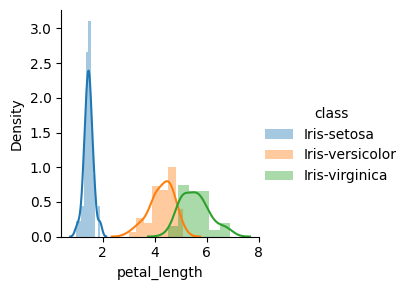

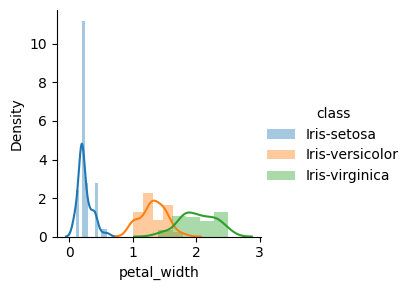

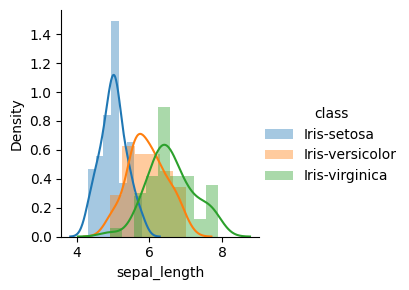

In [9]:
sns.FacetGrid(data, hue="class", height=3).map(sns.distplot, "petal_length").add_legend()
sns.FacetGrid(data, hue="class", height=3).map(sns.distplot, "petal_width").add_legend()
sns.FacetGrid(data, hue="class", height=3).map(sns.distplot, "sepal_length").add_legend()

heatmap korelasi 

<Axes: >

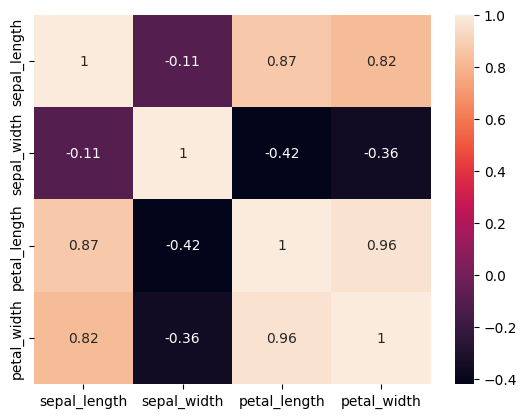

In [10]:
sns.heatmap(X.corr(),annot=True )

box plot

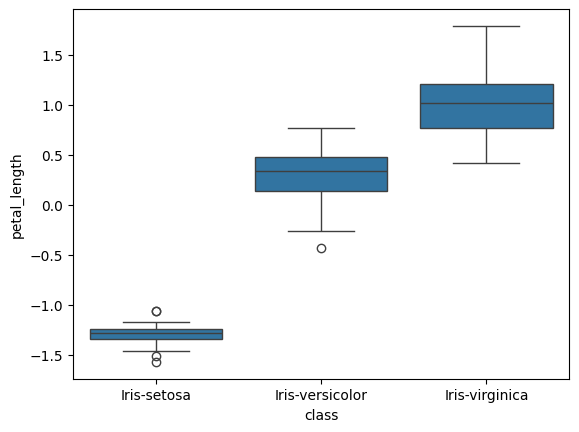

In [11]:
sns.boxplot(x="class", y="petal_length", data=X_plot)
plt.show()

violin plot

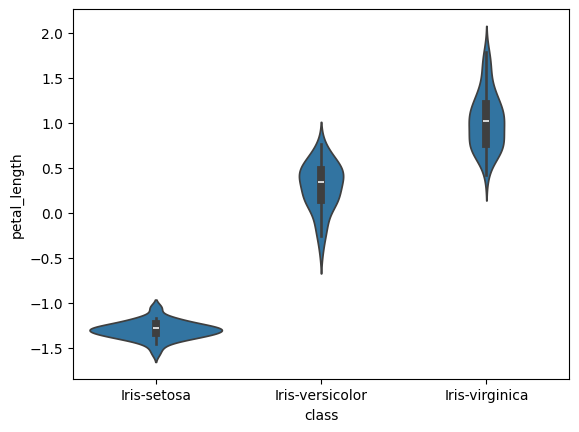

In [12]:
sns.violinplot(x="class",y="petal_length",data=X_plot)
plt.show()

Scatter plot

/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


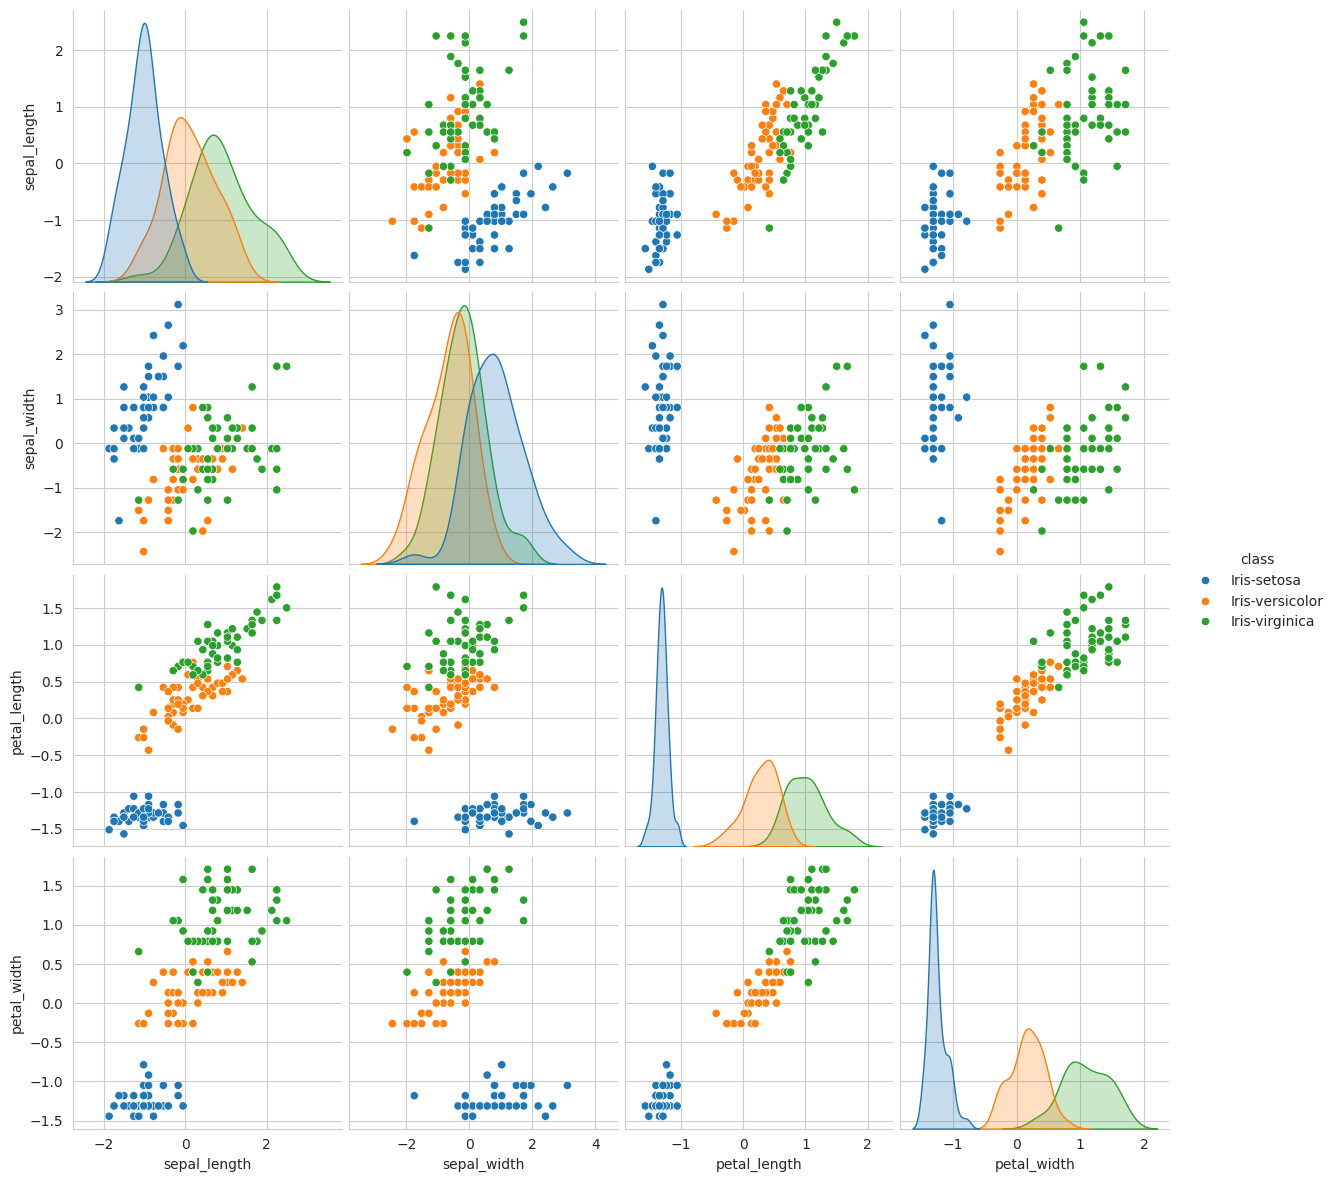

In [13]:
sns.set_style("whitegrid")
sns.pairplot(X_plot,hue="class",size=3);
plt.show()

## Modeling K-Means Clustering

### Clustering  

In [14]:
data = pd.read_csv('iris_dataset.csv')
print("Dataset loaded successfully")
data

Dataset loaded successfully


,id,sepal_length,sepal_width,petal_length,petal_width,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
X = data.iloc[:, :-1]   # Menghapus kolom terakhir (class)
X = X.drop(columns=['id'])  # Menghapus kolom 'id' dari X
y = data.iloc[:, -1]    # Kolom class
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Training data

In [16]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


visualisasi data clustering

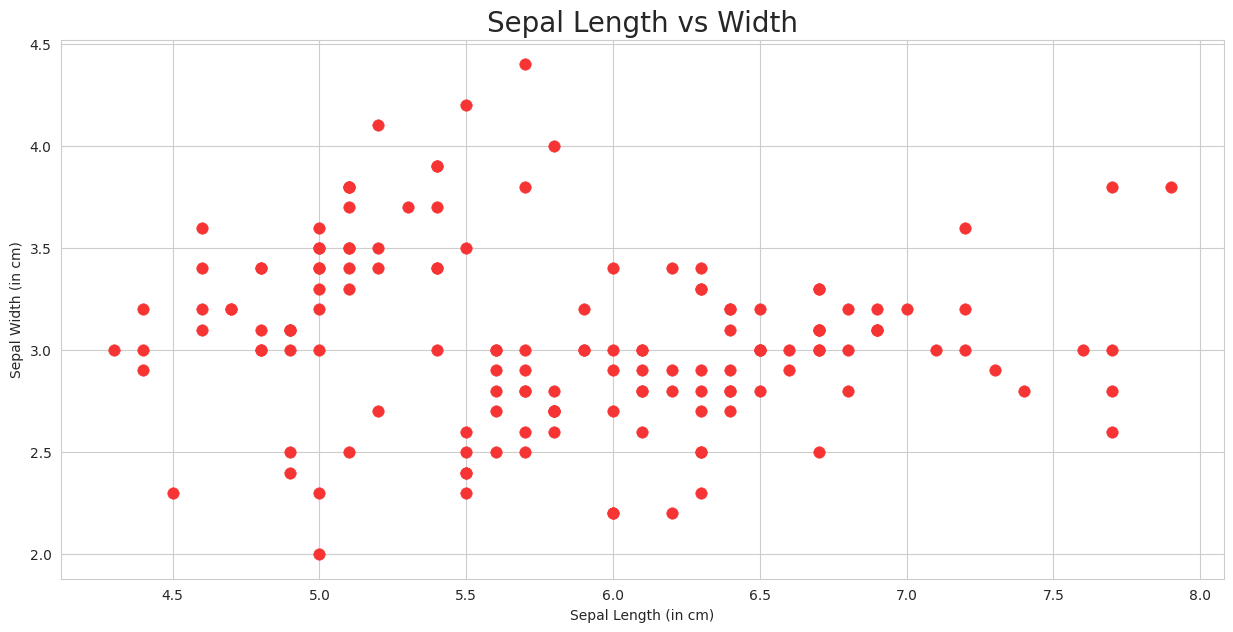

In [17]:
ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(x=X['sepal_length'],y=X['sepal_width'], s=70, color='#f73434', edgecolor='#f73434', linewidth=0.3)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Sepal Length vs Width', fontsize = 20)
plt.show()

nilai sse untuk cluster 2-4

In [18]:
sse=[]

for i in range(2,5):
    km = KMeans(i)
    km.fit(X)
    sse.append(km.inertia_)

sse

[152.36870647733915, 78.94506582597728, 57.4732732654949]

Elbow Method untuk cluster 2-4

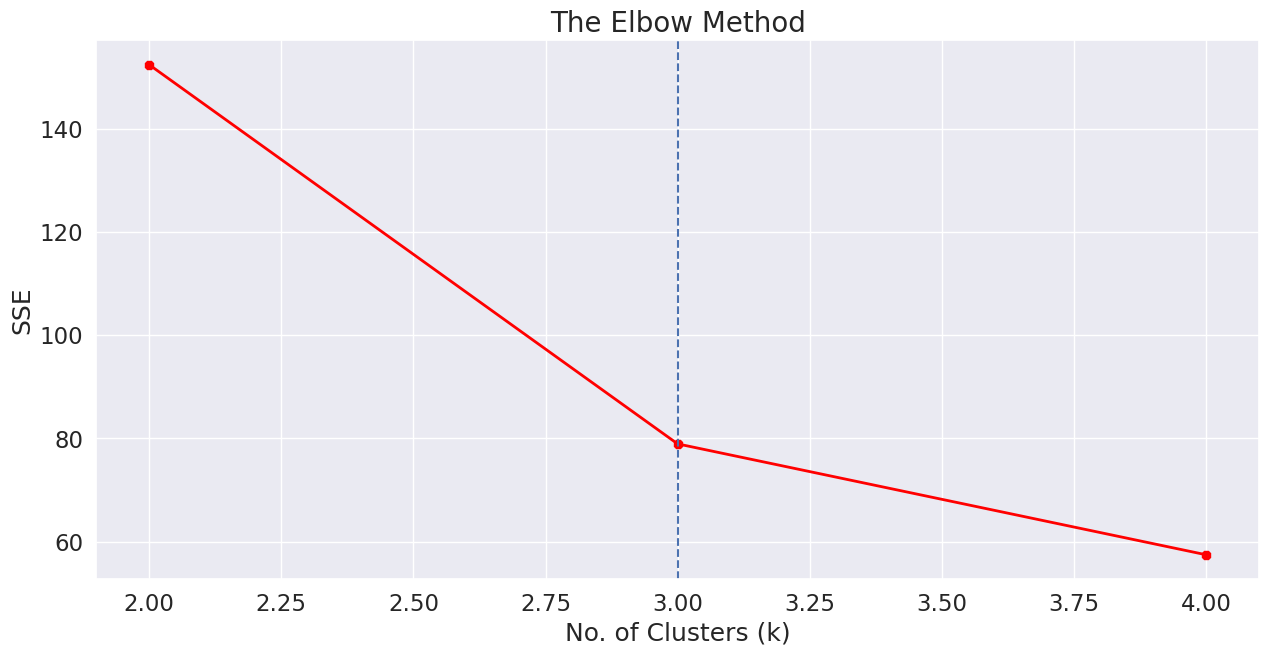

In [19]:
ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(2,5),sse, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('SSE')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

nilai silhouette untuk cluster 2-4

In [20]:
silhouette_scores = []

for i in range(2, 5):
    km = KMeans(i)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(float(score))

silhouette_scores

[0.6808136202936816, 0.5525919445499757, 0.49511999553021513]

## Uji Coba Clustering Tanpa Class

In [21]:
data = pd.read_csv("iris_dataset.csv")
print(data.head())

   id  sepal_length  sepal_width  petal_length  petal_width        class
0   1           5.1          3.5           1.4          0.2  Iris-setosa
1   2           4.9          3.0           1.4          0.2  Iris-setosa
2   3           4.7          3.2           1.3          0.2  Iris-setosa
3   4           4.6          3.1           1.5          0.2  Iris-setosa
4   5           5.0          3.6           1.4          0.2  Iris-setosa


In [22]:
X = data.drop(columns=["class", "id"]).values
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

### Uji Coba Clustering menggunakan 2 Centroid

In [24]:
kms = KMeans(n_clusters=2, random_state=0, n_init="auto", max_iter=300, tol=0.0001, verbose=0,copy_x=True,algorithm="lloyd").fit(X)
print("Hasil label cluster:", kms.labels_)

Hasil label cluster: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


menyimpan koordinat centroid (pusat) setiap klaster

In [25]:
print("Koordinat centroid tiap cluster:")
print(kms.cluster_centers_)

Koordinat centroid tiap cluster:
[[5.00566038 3.36037736 1.56226415 0.28867925]
 [6.30103093 2.88659794 4.95876289 1.69587629]]


 visualisasi hasil clustering menggunakan 2 centroid

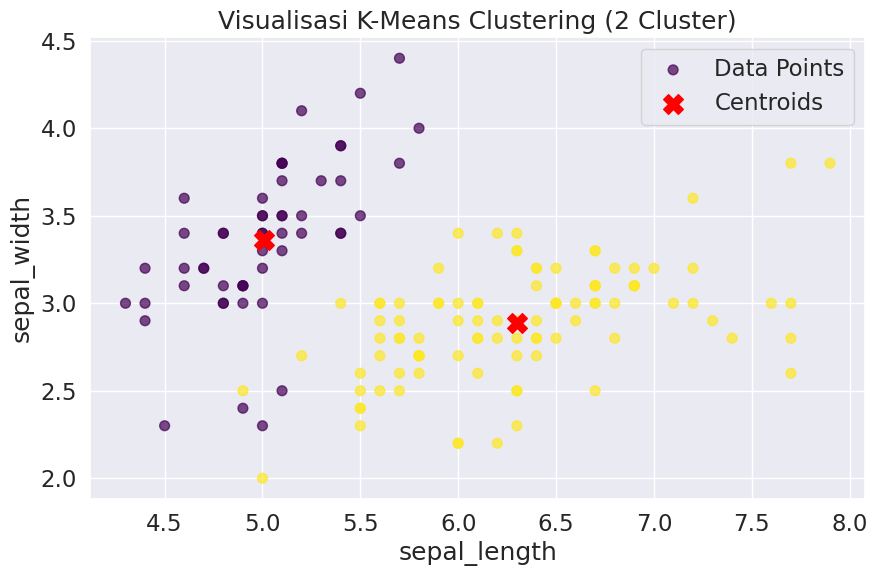

In [26]:
plt.figure(figsize=(10, 6))

# Plot data points dengan warna sesuai cluster
plt.scatter(X[:, 0], X[:, 1], c=kms.labels_, cmap='viridis', s=50, alpha=0.7, label='Data Points')

# Plot centroid
plt.scatter(kms.cluster_centers_[:, 0], kms.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')

plt.title('Visualisasi K-Means Clustering (2 Cluster)')
plt.xlabel(data.columns[1])  # Kolom pertama setelah menghapus 'class' dan 'id'
plt.ylabel(data.columns[2])  # Kolom kedua setelah menghapus 'class' dan 'id')
plt.legend()
plt.grid(True)
plt.show()

nilai sse dengan 2 centroid

In [27]:
print("SSE (Inertia) dari KMeans:", kms.inertia_)

SSE (Inertia) dari KMeans: 152.36870647733915


nilai Silhouette Score dengan 2 centroid

In [28]:
silhouette_avg = silhouette_score(X, kms.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6808136202936816


### Uji Coba Clustering menggunakan 3 Centroid

Menentukan centroid cluster

In [29]:
kms = KMeans(n_clusters=3, random_state=0, n_init="auto", max_iter=300, tol=0.0001, verbose=0,copy_x=True,algorithm="lloyd").fit(X)
print("Hasil label cluster:", kms.labels_)

Hasil label cluster: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


menyimpan koordinat centroid (pusat) setiap klaster

In [30]:
kms.cluster_centers_

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

 visualisasi hasil clustering menggunakan 3 centroid

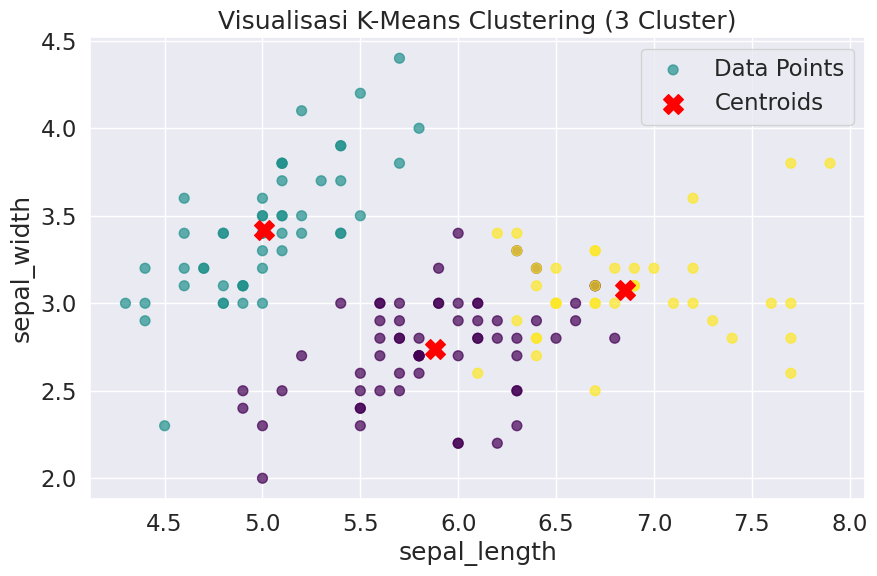

In [31]:
plt.figure(figsize=(10, 6))

# Plot data points dengan warna sesuai cluster
plt.scatter(X[:, 0], X[:, 1], c=kms.labels_, cmap='viridis', s=50, alpha=0.7, label='Data Points')

# Plot centroid
plt.scatter(kms.cluster_centers_[:, 0], kms.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')

plt.title('Visualisasi K-Means Clustering (3 Cluster)')
plt.xlabel(data.columns[1])  # Kolom pertama setelah menghapus 'class' dan 'id'
plt.ylabel(data.columns[2])  # Kolom kedua setelah menghapus 'class' dan 'id')
plt.legend()
plt.grid(True)
plt.show()

nilai sse dengan 3 centroid

In [32]:
print("SSE (Inertia) dari KMeans:", kms.inertia_)

SSE (Inertia) dari KMeans: 78.94506582597728


nilai Silhouette Score dengan 3 centroid

In [33]:
silhouette_avg = silhouette_score(X, kms.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5509643746707443


### Uji Coba Clustering menggunakan 4 Centroid

Menentukan centroid cluster

In [34]:
kms = KMeans(n_clusters=4, random_state=0, n_init="auto", max_iter=300, tol=0.0001, verbose=0,copy_x=True,algorithm="lloyd").fit(X)
print("Hasil label cluster:", kms.labels_)

Hasil label cluster: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 0 3 0 3 0 3 0 0 0 0 3 0 3 0 0 3 0 3 0 3 3
 3 3 3 3 3 0 0 0 0 3 0 3 3 3 0 0 0 3 0 0 0 0 0 3 0 0 2 3 2 2 2 2 0 2 2 2 3
 3 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 3
 2 3]


menyimpan koordinat centroid (pusat) setiap klaster

In [35]:
kms.cluster_centers_

array([[5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [6.2525    , 2.855     , 4.815     , 1.625     ]])

 visualisasi hasil clustering menggunakan 4 centroid

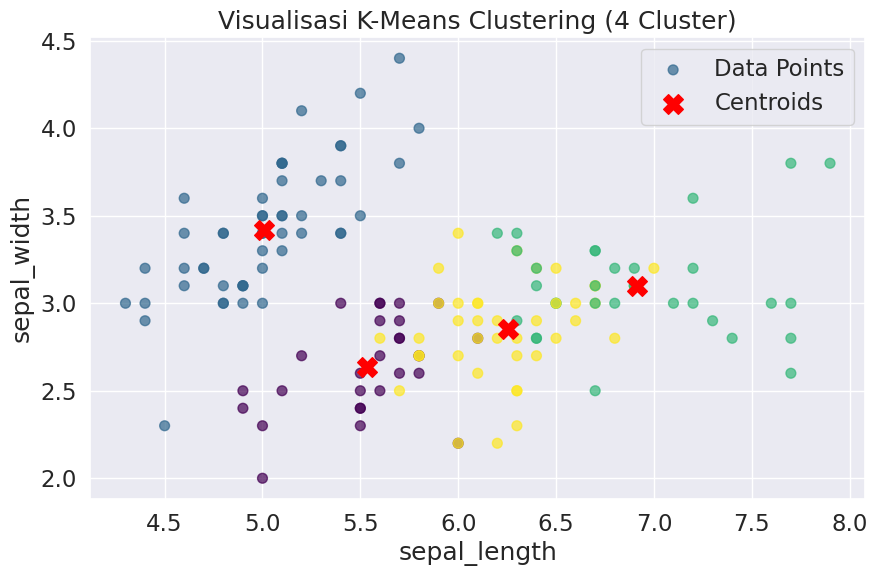

In [36]:
plt.figure(figsize=(10, 6))

# Plot data points dengan warna sesuai cluster
plt.scatter(X[:, 0], X[:, 1], c=kms.labels_, cmap='viridis', s=50, alpha=0.7, label='Data Points')

# Plot centroid
plt.scatter(kms.cluster_centers_[:, 0], kms.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')

plt.title('Visualisasi K-Means Clustering (4 Cluster)')
plt.xlabel(data.columns[1])  # Kolom pertama setelah menghapus 'class' dan 'id'
plt.ylabel(data.columns[2])  # Kolom kedua setelah menghapus 'class' dan 'id')
plt.legend()
plt.grid(True)
plt.show()

nilai sse dengan 4 centroid

In [37]:
sse = kms.inertia_
sse

57.317873214285726

nilai Silhouette Score dengan 4 centroid

In [38]:
silhouette_avg = silhouette_score(X, kms.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4978256901095472


## Uji Coba Clustering Menggunakan Class

In [39]:
data2 = pd.read_csv("iris_dataset.csv")
print(data2.head())

shilouette_scores2 = []
sse_scores2 = []

   id  sepal_length  sepal_width  petal_length  petal_width        class
0   1           5.1          3.5           1.4          0.2  Iris-setosa
1   2           4.9          3.0           1.4          0.2  Iris-setosa
2   3           4.7          3.2           1.3          0.2  Iris-setosa
3   4           4.6          3.1           1.5          0.2  Iris-setosa
4   5           5.0          3.6           1.4          0.2  Iris-setosa


In [40]:
le = LabelEncoder()
data2['class'] = le.fit_transform(data2['class'])

In [41]:
X = data2.drop(columns=["id"]).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00
  -1.22474487e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00
  -1.22474487e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00
  -1.22474487e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00
  -1.22474487e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00
  -1.22474487e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00
  -1.22474487e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00
  -1.22474487e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00
  -1.22474487e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00
  -1.22474487e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00
  -1.22474487e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00
  -1.22474487e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00

### Uji Coba Clustering menggunakan 2 Centroid

In [42]:
kms2 = KMeans(n_clusters=2, random_state=0, n_init="auto", max_iter=300, tol=0.0001, verbose=0,copy_x=True,algorithm="lloyd").fit(X_scaled)
print("Hasil label cluster:", kms2.labels_)

Hasil label cluster: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [43]:
kms2.cluster_centers_

array([[-1.01457897,  0.84230679, -1.30487835, -1.25512862, -1.22474487],
       [ 0.50728948, -0.4211534 ,  0.65243918,  0.62756431,  0.61237244]])

In [44]:
sse2 = kms2.inertia_
sse_scores2.append(sse2)
sse2

261.2320057367633

In [45]:
silhouette_avg = silhouette_score(X, kms2.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6822257796144715


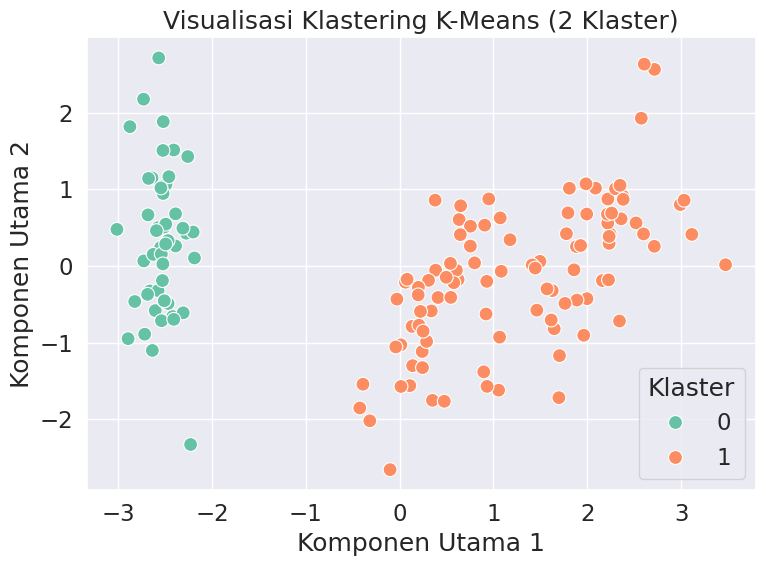

In [46]:
# Reduksi dimensi ke 2 komponen utama untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisasi klaster hasil KMeans
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kms2.labels_, palette="Set2", s=100)
plt.title("Visualisasi Klastering K-Means (2 Klaster)")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.legend(title="Klaster")
plt.grid(True)
plt.tight_layout()
plt.show()

### Uji Coba Clustering menggunakan 3 Centroid

In [47]:
kms2 = KMeans(n_clusters=3, random_state=0, n_init="auto", max_iter=300, tol=0.0001, verbose=0,copy_x=True,algorithm="lloyd").fit(X_scaled)
print("Hasil label cluster:", kms2.labels_)

Hasil label cluster: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [48]:
kms2.cluster_centers_

array([[ 0.01534793, -0.75437367,  0.28394942,  0.18318567,  0.07348469],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862, -1.22474487],
       [ 0.99923104, -0.08793313,  1.02092894,  1.07194295,  1.15126018]])

In [49]:
sse2 = kms2.inertia_
sse_scores2.append(sse2)
sse2

163.5620737524751

In [50]:
silhouette_avg = silhouette_score(X, kms2.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5665925399434756


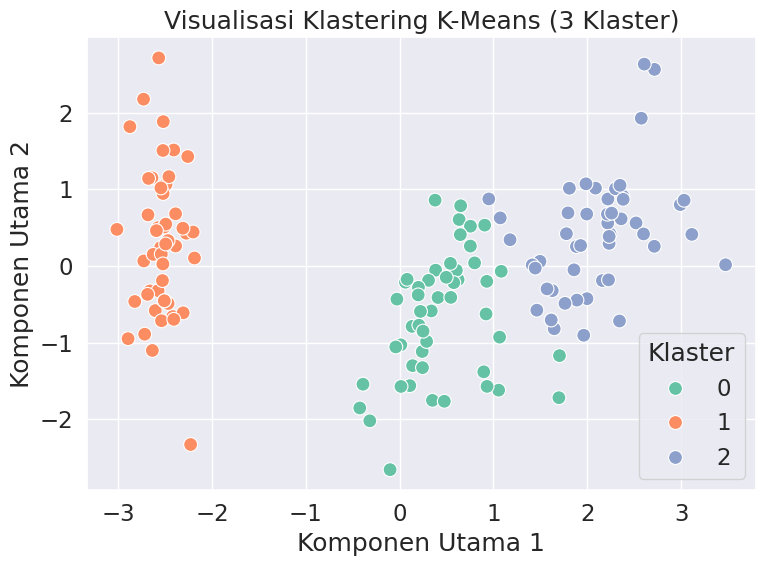

In [51]:
# Reduksi dimensi ke 2 komponen utama untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisasi klaster hasil KMeans
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kms2.labels_, palette="Set2", s=100)
plt.title("Visualisasi Klastering K-Means (3 Klaster)")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.legend(title="Klaster")
plt.grid(True)
plt.tight_layout()
plt.show()

### Uji Coba Clustering menggunakan 4 Centroid

In [52]:
kms2 = KMeans(n_clusters=4, random_state=0, n_init="auto", max_iter=300, tol=0.0001, verbose=0,copy_x=True,algorithm="lloyd").fit(X_scaled)
print("Hasil label cluster:", kms2.labels_)

Hasil label cluster: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 2 3 2 3 3 2 3 2 3 3
 2 3 2 2 3 2 3 3 2 3 2 3 2 3 3 2 2 2 3 3 3 2 2 2 3 3 2 2 3 3 3 2 3 3 3 2 2
 3 2]


In [53]:
kms2.cluster_centers_

array([[ 1.12282227e-01, -6.57184421e-01,  2.85086729e-01,
         1.67408915e-01,  1.23259516e-32],
       [-1.01457897e+00,  8.42306793e-01, -1.30487835e+00,
        -1.25512862e+00, -1.22474487e+00],
       [ 3.16265702e-01, -6.88373516e-01,  8.04789815e-01,
         8.59185386e-01,  1.22474487e+00],
       [ 1.40150837e+00,  2.43573047e-01,  1.20294131e+00,
         1.28239709e+00,  1.22474487e+00]])

In [54]:
sse2 = kms2.inertia_
sse_scores2.append(sse2)
sse2

138.2806397650385

In [55]:
silhouette_avg = silhouette_score(X, kms2.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5067454321265986


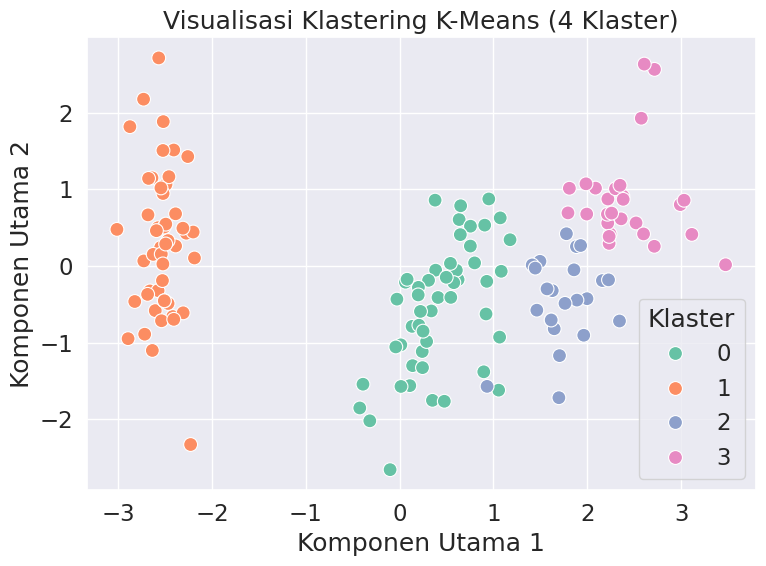

In [56]:
# Reduksi dimensi ke 2 komponen utama untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisasi klaster hasil KMeans
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kms2.labels_, palette="Set2", s=100)
plt.title("Visualisasi Klastering K-Means (4 Klaster)")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.legend(title="Klaster")
plt.grid(True)
plt.tight_layout()
plt.show()

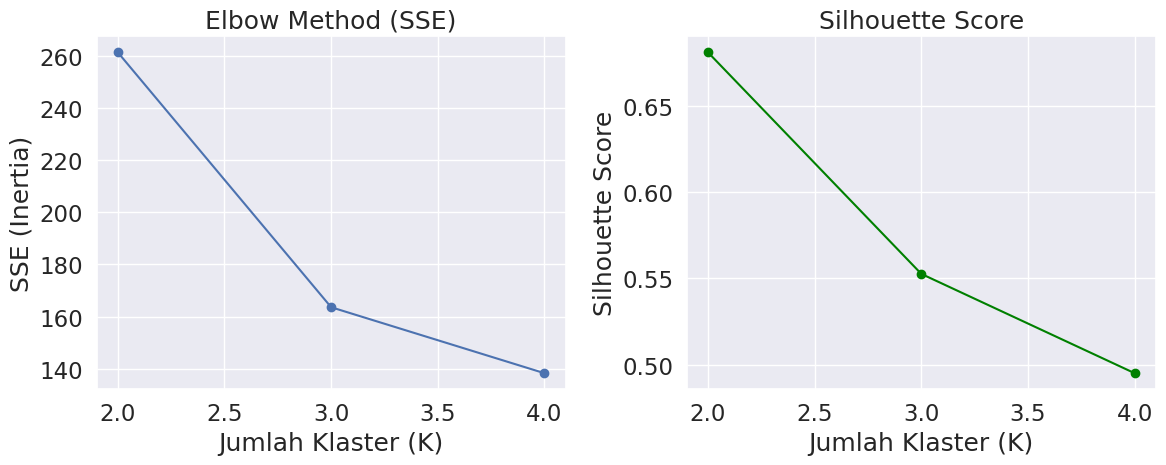

In [57]:
# 4. Visualisasi SSE dan Silhouette Score
plt.figure(figsize=(12, 5))

# Elbow Plot
plt.subplot(1, 2, 1)
plt.plot(range(2, 5), sse_scores2, marker='o')
plt.title('Elbow Method (SSE)')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('SSE (Inertia)')

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(range(2, 5), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# FUZZY C-MEANS  

## Konsep Fuzzy C-Means  

### Apa itu Fuzzy C-Means?  

Fuzzy c-means (FCM) adalah teknik pengelompokan data di mana satu set data dikelompokkan ke dalam N klaster dengan setiap titik data dalam set data tersebut termasuk dalam setiap klaster hingga tingkat tertentu. Misalnya, satu titik data yang terletak dekat dengan pusat klaster akan memiliki tingkat keanggotaan yang tinggi dalam klaster tersebut, dan titik data lain yang terletak jauh dari pusat klaster akan memiliki tingkat keanggotaan yang rendah dalam klaster tersebut.  

Tujuan utama FCM: Mencari pusat kluster sedemikian rupa sehingga setiap data memiliki derajat keanggotaan terhadap tiap kluster.Tujuan utama FCM: Mencari pusat kluster sedemikian rupa sehingga setiap data memiliki derajat keanggotaan terhadap tiap kluster.  

### Karakteristik FCM  

Fitur : Deskripsi
Metode : Klusterisasi Unsupervised learning (tidak memerlukan label)  
Jenis Klusterisasi : Fuzzy (soft clustering)  
Derajat Keanggotaan:Data bisa termasuk ke lebih dari satu kluster  
Output : Matriks derajat keanggotaan + pusat kluster  

### Prinsip Kerja FCM  

FCM bekerja dengan prinsip optimisasi fungsi tujuan (objective function) berikut:  

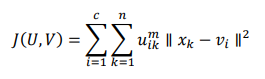

dimana:
- 𝑥𝑘: titik data ke-𝑘
- 𝑣𝑖
: pusat kluster ke-𝑖
- 𝑢𝑖𝑘: derajat keanggotaan 𝑥𝑘 pada kluster 𝑖
- 𝑚: eksponen fuzziness (𝑚 ≥ 1), biasanya 𝑚 = 2
- 𝑐: jumlah kluster - 𝑛: jumlah data  

Tujuan: Minimalkan nilai fungsi 𝐽 → cari nilai 𝑈 dan 𝑉 yang
optimal.

### Algoritma FCM  

1. Inisialisasi
– Pilih jumlah kluster 𝑐
– Pilih nilai fuzzifier 𝑚
– Inisialisasi matriks keanggotaan awal 𝑈
(0)
secara
acak, dengan syarat:  
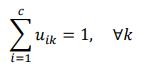  
 
2. Hitung pusat kluster 𝑉  
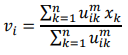  

3. Update derajat keanggotaan 𝑈  
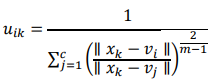  

4. Cek konvergensi  
– Hitung selisih antara matriks keanggotaan sebelum dan sesudah update.
– Jika perubahan < toleransi (𝜖), hentikan proses.
5. Iterasi ulang  
– Kembali ke langkah 2 sampai algoritma konvergen.
6. Tentukan kluster akhir  
– Untuk setiap data 𝑥𝑘, tentukan kluster utamanya
berdasarkan nilai 𝑢𝑖𝑘 tertinggi.

### Kelebihan FCM  
• Lebih fleksibel daripada K-Means karena mengizinkan keanggotaan parsial.  
• Cocok untuk data yang tidak jelas batasnya antar kluster.  
• Memberikan informasi ketidakpastian tentang keanggotaan kluster.  


### Kekurangan FCM  
• Sensitif terhadap inisialisasi awal.  
• Perlu menentukan jumlah kluster 𝑐 secara manual.  
• Komputasi agak lambat untuk dataset besar.  
• Hasil bisa berbeda-beda setiap kali running karena inisialisasi acak.  

In [58]:
import numpy as np
import pandas as pd

data = np.array([
    [1, 2],  # Data-1
    [2, 3],  # Data-2
    [3, 4],  # Data-3
    [6, 7],  # Data-4
    [7, 8]   # Data-5
])

# Buat DataFrame untuk tampilan tabel
df = pd.DataFrame(data, columns=["X1", "X2"], index=[f"Data-{i+1}" for i in range(len(data))])

print("Ini adalah data awal:")
print(df)

Ini adalah data awal:
        X1  X2
Data-1   1   2
Data-2   2   3
Data-3   3   4
Data-4   6   7
Data-5   7   8


Konvergen terkecil di Iterasi 6


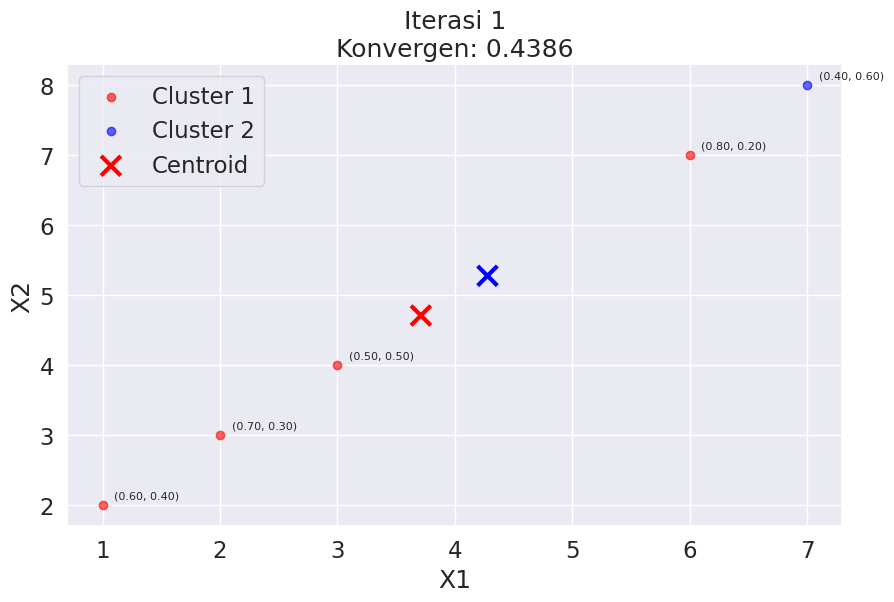


Iterasi 1:
Derajat Keanggotaan:
[[0.6 0.4]
 [0.7 0.3]
 [0.5 0.5]
 [0.8 0.2]
 [0.4 0.6]]
Nilai Centroid:
[[3.71052632 4.71052632]
 [4.27777778 5.27777778]]
Nilai Konvergen: 0.438628


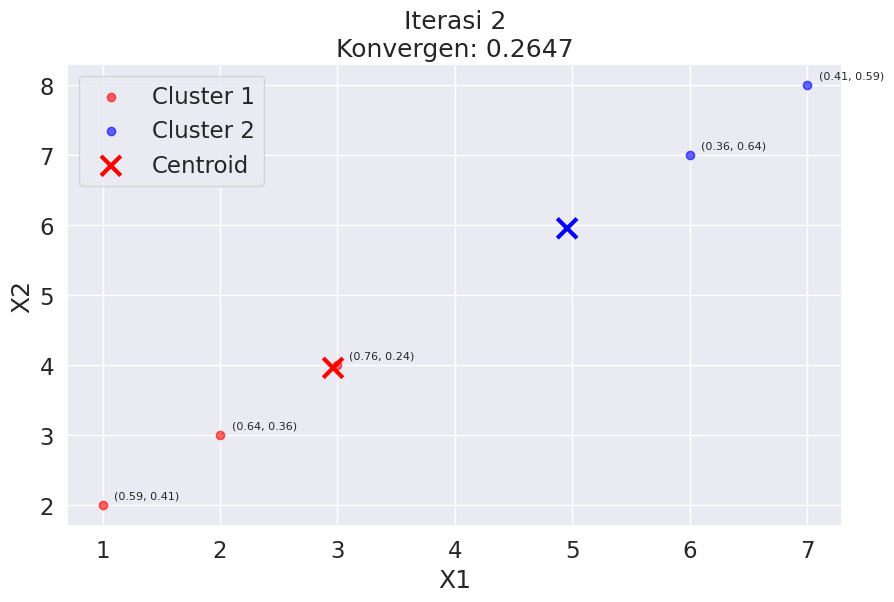


Iterasi 2:
Derajat Keanggotaan:
[[0.59388413 0.40611587]
 [0.63940864 0.36059136]
 [0.763821   0.236179  ]
 [0.36137228 0.63862772]
 [0.40647472 0.59352528]]
Nilai Centroid:
[[2.9624668  3.9624668 ]
 [4.95591687 5.95591687]]
Nilai Konvergen: 0.264734


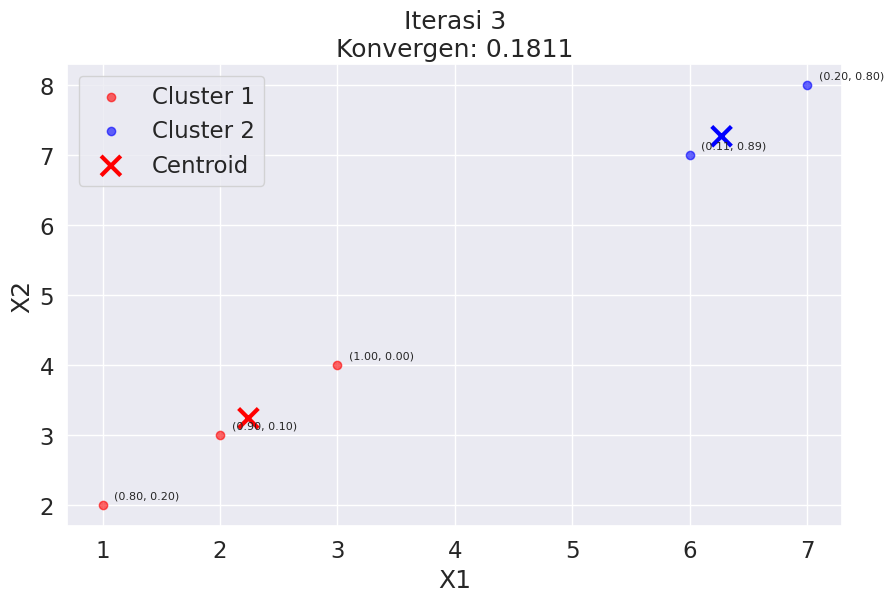


Iterasi 3:
Derajat Keanggotaan:
[[8.02504282e-01 1.97495718e-01]
 [9.04142925e-01 9.58570750e-02]
 [9.99631896e-01 3.68103947e-04]
 [1.05664382e-01 8.94335618e-01]
 [2.04017872e-01 7.95982128e-01]]
Nilai Centroid:
[[2.24190074 3.24190074]
 [6.27119696 7.27119696]]
Nilai Konvergen: 0.181094


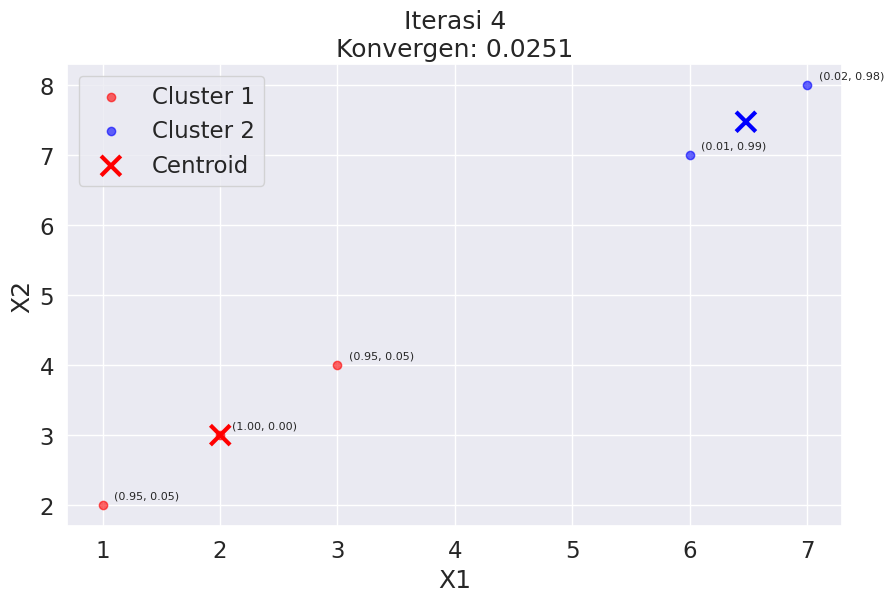


Iterasi 4:
Derajat Keanggotaan:
[[0.94741114 0.05258886]
 [0.99680269 0.00319731]
 [0.94902955 0.05097045]
 [0.00518057 0.99481943]
 [0.02292355 0.97707645]]
Nilai Centroid:
[[2.00207849 3.00207849]
 [6.47853877 7.47853877]]
Nilai Konvergen: 0.025071


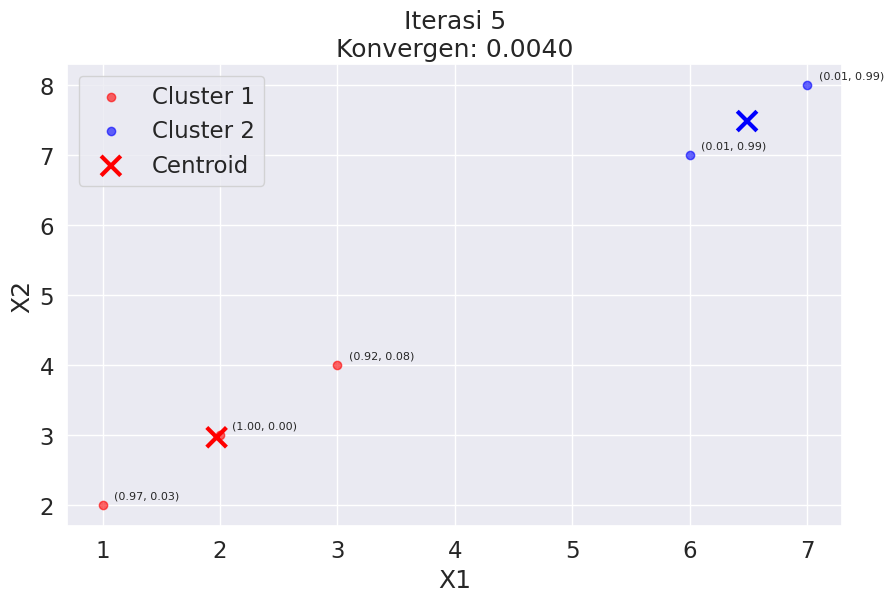


Iterasi 5:
Derajat Keanggotaan:
[[9.67627070e-01 3.23729305e-02]
 [9.99999785e-01 2.15389662e-07]
 [9.23958361e-01 7.60416389e-02]
 [1.41249719e-02 9.85875028e-01]
 [1.07686942e-02 9.89231306e-01]]
Nilai Centroid:
[[1.97089032 2.97089032]
 [6.48840903 7.48840903]]
Nilai Konvergen: 0.004020


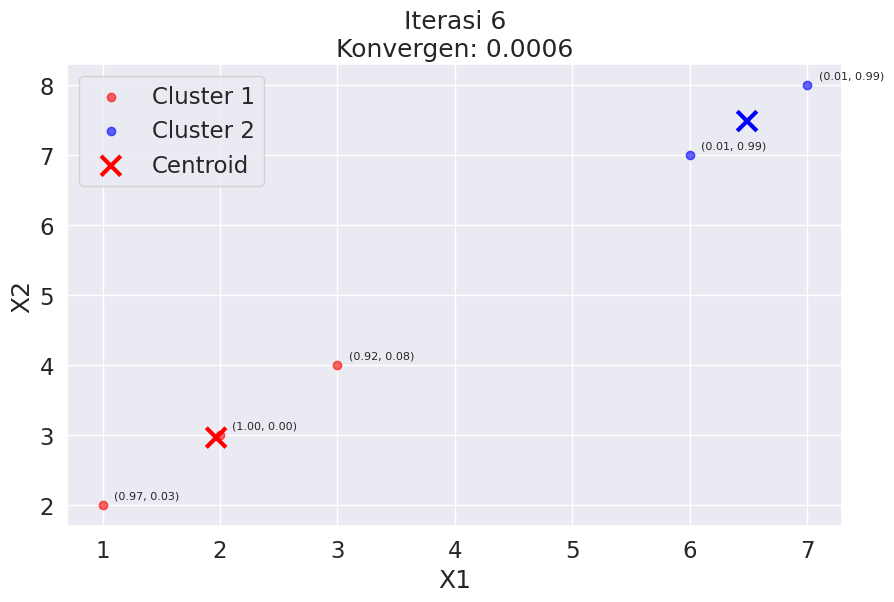


Iterasi 6:
Derajat Keanggotaan:
[[9.69656524e-01 3.03434758e-02]
 [9.99957940e-01 4.20602358e-05]
 [9.19937890e-01 8.00621096e-02]
 [1.44815136e-02 9.85518486e-01]
 [1.02421817e-02 9.89757818e-01]]
Nilai Centroid:
[[1.96677682 2.96677682]
 [6.48809524 7.48809524]]
Nilai Konvergen: 0.000603

Hasil Akhir:
Nilai Centroid Akhir:
[[1.96619788 2.96619788]
 [6.48794308 7.48794308]]

Derajat Keanggotaan Akhir:
[[9.69902040e-01 3.00979597e-02]
 [9.99945206e-01 5.47941704e-05]
 [9.19334955e-01 8.06650452e-02]
 [1.44341196e-02 9.85565880e-01]
 [1.02380375e-02 9.89761962e-01]]

Riwayat Nilai Konvergen:
[np.float64(0.4386277226278892), np.float64(0.2647342853049488), np.float64(0.18109432054359187), np.float64(0.025071185646415195), np.float64(0.004020470707437454), np.float64(0.000602935614064326)]


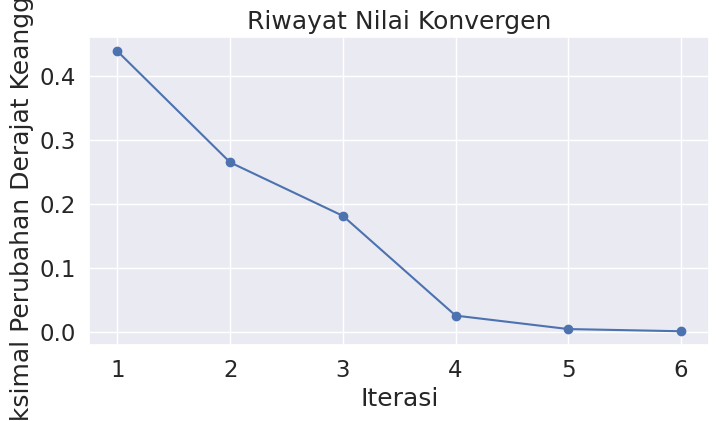

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class FuzzyCMeans:
    def __init__(self, n_clusters=2, max_iter=100, m=2, error=0.001):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.m = m  # Fuzziness parameter
        self.error = error  # Convergence threshold
        
    def initialize_membership(self, X, initial_u):
        if initial_u is not None:
            return initial_u.copy()
        else:
            # Random initialization if no initial membership provided
            n_samples = X.shape[0]
            u = np.random.rand(n_samples, self.n_clusters)
            return u / np.sum(u, axis=1, keepdims=True)
    
    def compute_centroids(self, X, u):
        um = u ** self.m
        centroids = np.dot(um.T, X) / np.sum(um.T, axis=1, keepdims=True)
        return centroids
    
    def update_membership(self, X, centroids):
        power = 2 / (self.m - 1)
        n_samples = X.shape[0]
        n_clusters = centroids.shape[0]
        
        # Calculate distances between each data point and each centroid
        distances = np.zeros((n_samples, n_clusters))
        for i in range(n_clusters):
            distances[:, i] = np.linalg.norm(X - centroids[i], axis=1)
        
        # Avoid division by zero
        distances = np.fmax(distances, np.finfo(np.float64).eps)
        
        # Calculate new membership values
        inv_dist = 1.0 / distances
        new_u = inv_dist ** power
        new_u = new_u / np.sum(new_u, axis=1, keepdims=True)
        
        return new_u
    
    def fit(self, X, initial_u=None):
        self.u = self.initialize_membership(X, initial_u)
        self.centroids = []
        self.memberships = []
        self.convergence = []
        
        for iteration in range(self.max_iter):
            # Store current centroids and memberships for visualization
            old_centroids = self.compute_centroids(X, self.u)
            self.centroids.append(old_centroids.copy())
            self.memberships.append(self.u.copy())
            
            # Update centroids
            new_centroids = self.compute_centroids(X, self.u)
            
            # Update membership values
            new_u = self.update_membership(X, new_centroids)
            
            # Calculate convergence (max change in membership)
            delta = np.max(np.abs(new_u - self.u))
            self.convergence.append(delta)
            
            # Update for next iteration
            self.u = new_u
            
            # Check for convergence
            if delta < self.error:
                print(f"Konvergen terkecil di Iterasi {iteration + 1}")
                break
                
        # Store final centroids and memberships
        self.centroids.append(self.compute_centroids(X, self.u))
        self.memberships.append(self.u.copy())
        self.final_centroids = self.centroids[-1]
        
        return self
    
    def plot_iteration(self, X, iteration):
        centroids = self.centroids[iteration]
        u = self.memberships[iteration]
        
        plt.figure(figsize=(10, 6))
        
        # Create custom colormap for membership visualization
        cmap = ListedColormap(['red', 'blue'])
        
        # Plot data points colored by their highest membership
        cluster_assignment = np.argmax(u, axis=1)
        for i in range(self.n_clusters):
            cluster_points = X[cluster_assignment == i]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                        c=[cmap(i)], label=f'Cluster {i+1}', alpha=0.6)
        
        # Plot centroids
        plt.scatter(centroids[:, 0], centroids[:, 1], 
                    c=['red', 'blue'], marker='x', s=200, linewidths=3, label='Centroid')
        
        # Add membership values as text
        for i, point in enumerate(X):
            plt.text(point[0]+0.1, point[1]+0.1, 
                     f'({u[i, 0]:.2f}, {u[i, 1]:.2f})', fontsize=8)
        
        plt.title(f'Iterasi {iteration + 1}\nKonvergen: {self.convergence[iteration]:.4f}')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.legend()
        plt.grid(True)
        plt.show()

# Data preparation
data = np.array([
    [1, 2],  # Data-1
    [2, 3],  # Data-2
    [3, 4],  # Data-3
    [6, 7],  # Data-4
    [7, 8]   # Data-5
])

# Initial membership matrix
initial_u = np.array([
    [0.6, 0.4],  # Data-1
    [0.7, 0.3],  # Data-2
    [0.5, 0.5],  # Data-3
    [0.8, 0.2],  # Data-4
    [0.4, 0.6]   # Data-5
])

# Parameters
n_clusters = 2
max_iter = 20
m = 2

# Run Fuzzy C-Means
fcm = FuzzyCMeans(n_clusters=n_clusters, max_iter=max_iter, m=m)
fcm.fit(data, initial_u=initial_u)

# Display results for each iteration
for i in range(len(fcm.centroids)-1):
    fcm.plot_iteration(data, i)
    
    print(f"\nIterasi {i + 1}:")
    print("Derajat Keanggotaan:")
    print(fcm.memberships[i])
    print("Nilai Centroid:")
    print(fcm.centroids[i])
    print(f"Nilai Konvergen: {fcm.convergence[i]:.6f}")

# Final results
print("\nHasil Akhir:")
print("Nilai Centroid Akhir:")
print(fcm.final_centroids)
print("\nDerajat Keanggotaan Akhir:")
print(fcm.u)
print("\nRiwayat Nilai Konvergen:")
print(fcm.convergence)

# Plot convergence history
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(fcm.convergence)+1), fcm.convergence, marker='o')
plt.title('Riwayat Nilai Konvergen')
plt.xlabel('Iterasi')
plt.ylabel('Maksimal Perubahan Derajat Keanggotaan')
plt.grid(True)
plt.show()

## Implementasi Menggunakan Data IRIS

In [60]:
import pymysql
import psycopg2
import pandas as pd
from sqlalchemy import create_engine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

ModuleNotFoundError: No module named 'pymysql'

In [16]:
data = pd.read_csv('iris_dataset.csv')
print("Dataset loaded successfully")
data

Dataset loaded successfully


,id,sepal_length,sepal_width,petal_length,petal_width,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = data.drop(columns=['id', 'class']).values

scaler = StandardScaler()
data = scaler.fit_transform(X)

In [18]:
# Parameter Fuzzy C-Means
c = 3        # Jumlah cluster
m = 2.0      # Fuzziness parameter
n_data = data.shape[0]

# Inisialisasi keanggotaan U secara acak
U = np.random.dirichlet(np.ones(c), size=n_data).T

# Fungsi update pusat cluster
def update_centers(U, data, m):
    um = U ** m
    return (um @ data) / np.sum(um, axis=1)[:, None]

# Fungsi update keanggotaan fuzzy
def update_membership(data, centers, m):
    c = centers.shape[0]
    n = data.shape[0]
    new_U = np.zeros((c, n))
    for j in range(n):
        for i in range(c):
            dist_ij = np.linalg.norm(data[j] - centers[i])
            if dist_ij == 0:
                new_U[:, j] = 0
                new_U[i, j] = 1
                break
            else:
                sum_term = 0
                for k in range(c):
                    dist_kj = np.linalg.norm(data[j] - centers[k])
                    sum_term += (dist_ij / dist_kj) ** (2 / (m - 1))
                new_U[i, j] = 1 / sum_term
    return new_U

# Fungsi objektif
def compute_objective_function(U, centers, data, m):
    total = 0
    for i in range(c):
        for j in range(n_data):
            dist_sq = np.linalg.norm(data[j] - centers[i]) ** 2
            total += (U[i][j] ** m) * dist_sq
    return total

# Iterasi FCM
epsilon = 1e-2 
max_iter = 200
J_prev = 0

for iteration in range(1, max_iter + 1):
    centers = update_centers(U, data, m)
    U = update_membership(data, centers, m)
    J = compute_objective_function(U, centers, data, m)

    print(f"Iterasi {iteration} - Fungsi Objektif: {J:.6f}")

    if iteration > 1 and abs(J - J_prev) < epsilon:
        print("Konvergen. Iterasi dihentikan.")
        break
    J_prev = J

if iteration == max_iter:
    print("Maksimum iterasi tercapai tanpa konvergensi.")

# =======================
# Evaluasi: Silhouette Score
# =======================

# Konversi ke label keras
labels = np.argmax(U, axis=0)

# Hitung Silhouette Score
sil_score = silhouette_score(data, labels)
print(f"\nSilhouette Score: {sil_score:.4f}")


Iterasi 1 - Fungsi Objektif: 192.863266
Iterasi 2 - Fungsi Objektif: 164.473883
Iterasi 3 - Fungsi Objektif: 120.286898
Iterasi 4 - Fungsi Objektif: 106.910733
Iterasi 5 - Fungsi Objektif: 102.715244
Iterasi 6 - Fungsi Objektif: 101.490621
Iterasi 7 - Fungsi Objektif: 101.263232
Iterasi 8 - Fungsi Objektif: 101.228686
Iterasi 9 - Fungsi Objektif: 101.223467
Konvergen. Iterasi dihentikan.

Silhouette Score: 0.4574


### Implementasi dengan data outlier  

In [19]:
data = pd.read_csv("data_gabungan.csv")
data = data.drop(columns=["id", "class"]).values 

c = 3        # Jumlah cluster
m = 2.0      # Fuzziness parameter
n_data = data.shape[0]

# Inisialisasi keanggotaan U secara acak
U = np.random.dirichlet(np.ones(c), size=n_data).T

def update_centers(U, data, m):
    um = U ** m
    return (um @ data) / np.sum(um, axis=1)[:, None]

def update_membership(data, centers, m):
    c = centers.shape[0]
    n = data.shape[0]
    new_U = np.zeros((c, n))
    for j in range(n):
        for i in range(c):
            dist_ij = np.linalg.norm(data[j] - centers[i])
            if dist_ij == 0:
                new_U[:, j] = 0
                new_U[i, j] = 1
                break
            else:
                sum_term = 0
                for k in range(c):
                    dist_kj = np.linalg.norm(data[j] - centers[k])
                    sum_term += (dist_ij / dist_kj) ** (2 / (m - 1))
                new_U[i, j] = 1 / sum_term
    return new_U

def compute_objective_function(U, centers, data, m):
    total = 0
    for i in range(c):
        for j in range(n_data):
            dist_sq = np.linalg.norm(data[j] - centers[i]) ** 2
            total += (U[i][j] ** m) * dist_sq
    return total

epsilon = 1e-2 
max_iter = 200
J_prev = 0

for iteration in range(1, max_iter + 1):
    centers = update_centers(U, data, m)
    U = update_membership(data, centers, m)
    J = compute_objective_function(U, centers, data, m)

    print(f"Iterasi {iteration} - Fungsi Objektif: {J:.6f}")

    if iteration > 1 and abs(J - J_prev) < epsilon:
        print("Konvergen. Iterasi dihentikan.")
        break
    J_prev = J

if iteration == max_iter:
    print("Maksimum iterasi tercapai tanpa konvergensi.")

# =======================
# 3. Silhouette Score
# =======================

# Konversi keanggotaan fuzzy ke label keras
labels = np.argmax(U, axis=0)

# Hitung Silhouette Score
sil_score = silhouette_score(data, labels)
print(f"\nSilhouette Score: {sil_score:.4f}")

Iterasi 1 - Fungsi Objektif: 223.493342
Iterasi 2 - Fungsi Objektif: 198.330683
Iterasi 3 - Fungsi Objektif: 126.858844
Iterasi 4 - Fungsi Objektif: 85.553430
Iterasi 5 - Fungsi Objektif: 69.469548
Iterasi 6 - Fungsi Objektif: 64.503596
Iterasi 7 - Fungsi Objektif: 62.398112
Iterasi 8 - Fungsi Objektif: 61.415082
Iterasi 9 - Fungsi Objektif: 60.953730
Iterasi 10 - Fungsi Objektif: 60.742205
Iterasi 11 - Fungsi Objektif: 60.647811
Iterasi 12 - Fungsi Objektif: 60.606615
Iterasi 13 - Fungsi Objektif: 60.588923
Iterasi 14 - Fungsi Objektif: 60.581408
Konvergen. Iterasi dihentikan.

Silhouette Score: 0.5493
